In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

olivetti_faces = fetch_openml("olivetti_faces", as_frame=False ,parser='auto')
X, y = olivetti_faces.data, olivetti_faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=40, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=80, stratify=y_train, random_state=43)

In [69]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
print(pca.n_components_)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)
199


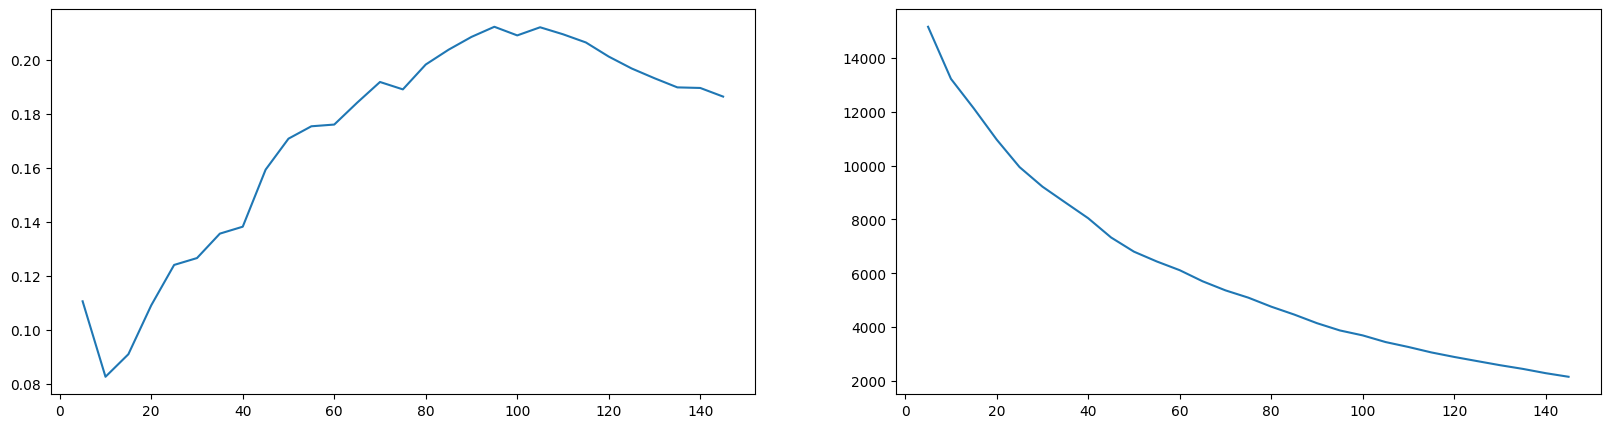

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
inertia_scores = []
kmeans_per_k = []
k_range = range(5, 150, 5)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
inertia_scores = [model.inertia_ for model in kmeans_per_k]
    
figure, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 5)) 
axis1.plot([i for i in k_range], silhouette_scores)
axis2.plot([i for i in k_range], inertia_scores )
plt.show()

In [87]:
best_index = np.argmax(silhouette_scores)
k_range = range(5, 150, 5)
best_k = k_range[best_index]
best_model = kmeans_per_k[best_index]
labels = best_model.fit_predict(X_train_pca)
print(best_index, best_k, best_model)

18 95 KMeans(n_clusters=95, n_init='auto', random_state=42)


Cluster ID: 0


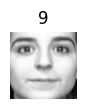

Cluster ID: 1


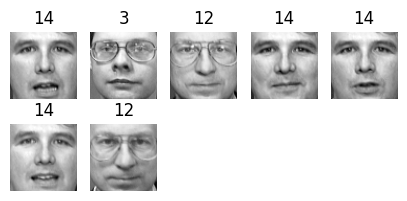

Cluster ID: 2


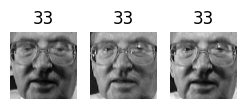

Cluster ID: 3


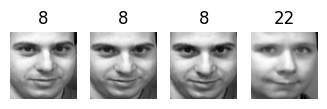

Cluster ID: 4


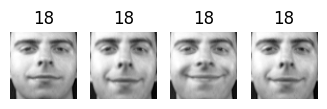

Cluster ID: 5


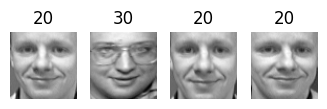

Cluster ID: 6


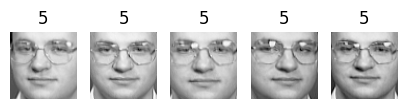

Cluster ID: 7


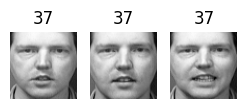

Cluster ID: 8


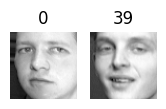

Cluster ID: 9


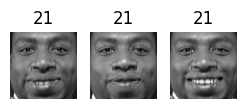

Cluster ID: 10


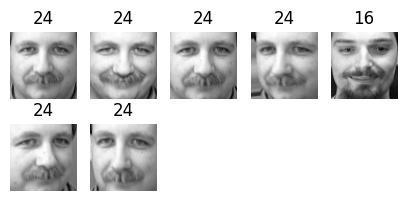

Cluster ID: 11


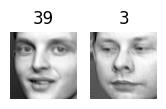

Cluster ID: 12


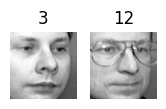

Cluster ID: 13


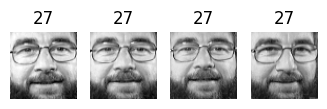

Cluster ID: 14


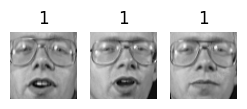

Cluster ID: 15


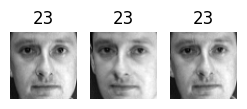

Cluster ID: 16


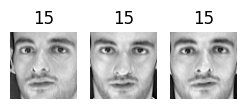

Cluster ID: 17


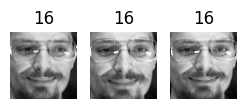

Cluster ID: 18


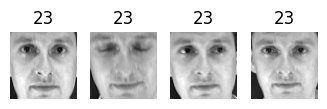

Cluster ID: 19


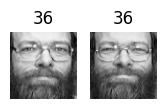

Cluster ID: 20


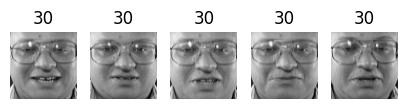

Cluster ID: 21


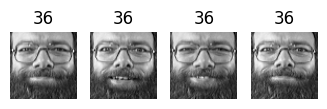

Cluster ID: 22


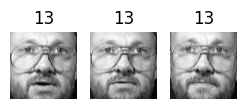

Cluster ID: 23


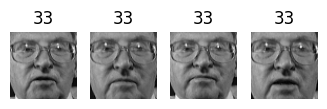

Cluster ID: 24


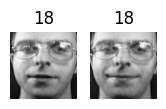

Cluster ID: 25


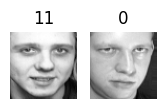

Cluster ID: 26


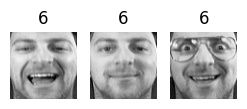

Cluster ID: 27


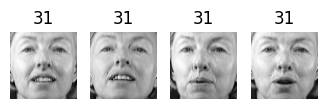

Cluster ID: 28


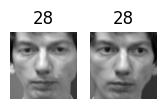

Cluster ID: 29


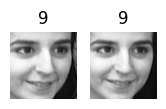

Cluster ID: 30


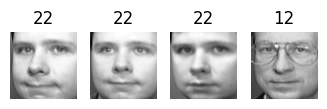

Cluster ID: 31


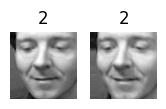

Cluster ID: 32


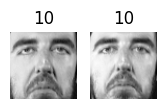

Cluster ID: 33


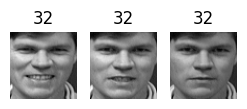

Cluster ID: 34


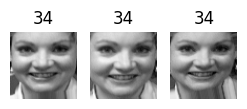

Cluster ID: 35


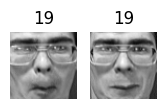

Cluster ID: 36


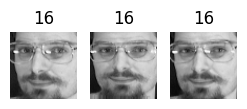

Cluster ID: 37


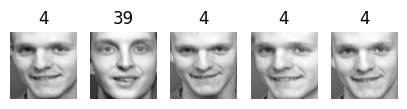

Cluster ID: 38


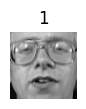

Cluster ID: 39


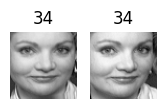

Cluster ID: 40


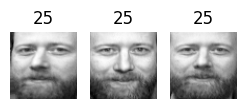

Cluster ID: 41


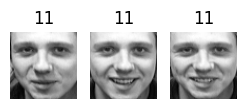

Cluster ID: 42


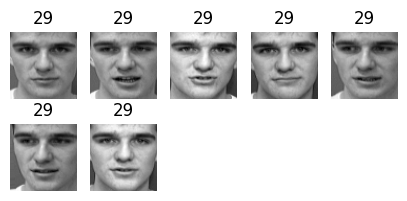

Cluster ID: 43


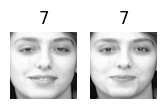

Cluster ID: 44


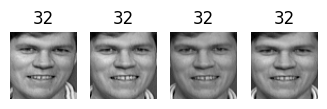

Cluster ID: 45


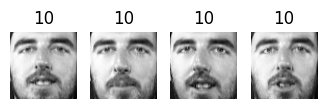

Cluster ID: 46


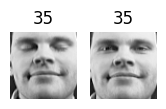

Cluster ID: 47


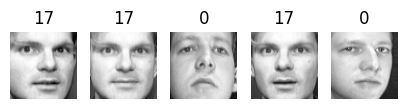

Cluster ID: 48


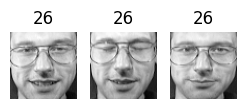

Cluster ID: 49


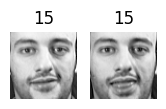

Cluster ID: 50


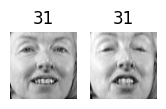

Cluster ID: 51


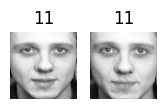

Cluster ID: 52


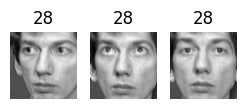

Cluster ID: 53


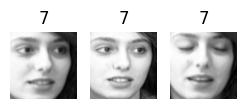

Cluster ID: 54


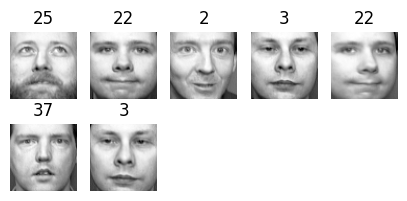

Cluster ID: 55


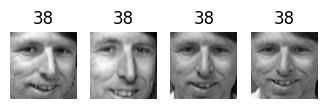

Cluster ID: 56


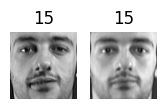

Cluster ID: 57


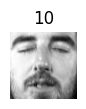

Cluster ID: 58


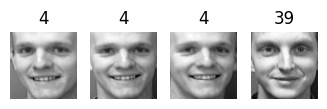

Cluster ID: 59


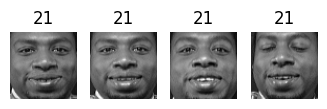

Cluster ID: 60


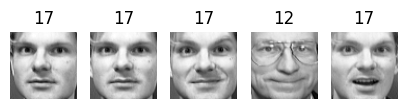

Cluster ID: 61


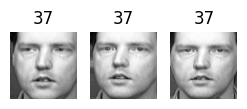

Cluster ID: 62


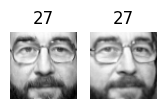

Cluster ID: 63


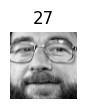

Cluster ID: 64


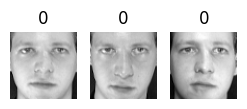

Cluster ID: 65


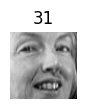

Cluster ID: 66


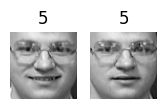

Cluster ID: 67


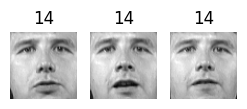

Cluster ID: 68


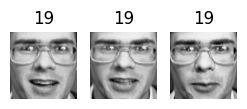

Cluster ID: 69


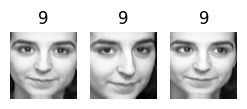

Cluster ID: 70


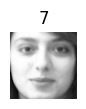

Cluster ID: 71


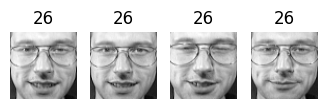

Cluster ID: 72


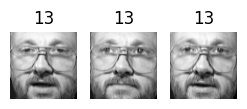

Cluster ID: 73


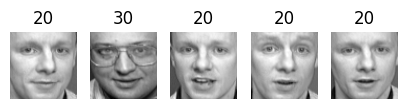

Cluster ID: 74


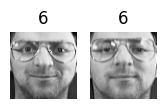

Cluster ID: 75


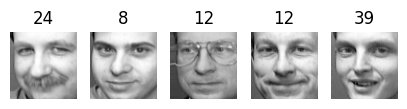

Cluster ID: 76


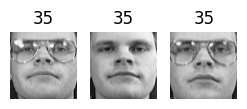

Cluster ID: 77


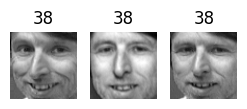

Cluster ID: 78


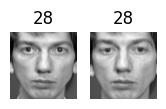

Cluster ID: 79


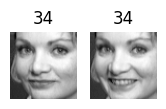

Cluster ID: 80


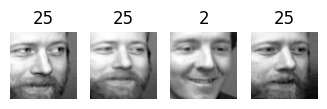

Cluster ID: 81


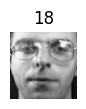

Cluster ID: 82


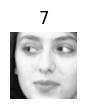

Cluster ID: 83


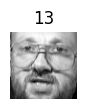

Cluster ID: 84


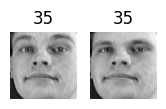

Cluster ID: 85


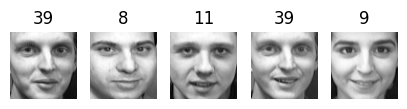

Cluster ID: 86


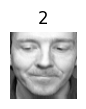

Cluster ID: 87


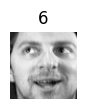

Cluster ID: 88


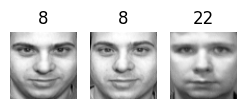

Cluster ID: 89


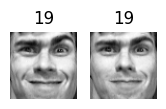

Cluster ID: 90


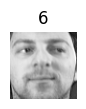

Cluster ID: 91


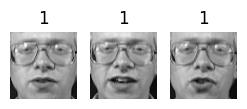

Cluster ID: 92


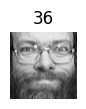

Cluster ID: 93


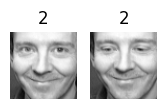

Cluster ID: 94


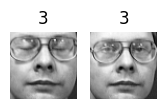

In [86]:
def plot_faces(faces, labels, n_cols=5):    
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print(f"Cluster ID: {cluster_id}")
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)


In [ ]:
faces_train = [X_train[i].reshape(64, 64) for i in range(0, len(X_train-1))]
plt.imshow(faces_train[0]*255)